In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Y1 = pd.read_csv("data_Y1.csv")
Y1.head()

,Year,MemberID,LabCount_total,LabCount_months,DrugCount_total,DrugCount_months,no_Claims,no_Providers,no_Vendors,no_PCPs,...,age_55,age_65,age_75,age_85,age_MISS,SexMALE,sexFEMALE,sexMISS,ClaimsTruncated,TARGET
0,Y1,210,2.0,1.0,5.0,3.0,8,4,4,2,...,0,0,0,0,0,0,0,1,0,0
1,Y1,3889,10.0,1.0,30.0,10.0,13,7,7,1,...,0,0,0,0,1,0,1,0,0,0
2,Y1,11951,3.0,1.0,0.0,0.0,6,3,3,1,...,0,0,0,0,0,0,1,0,0,1
3,Y1,14661,2.0,1.0,1.0,1.0,2,2,2,1,...,0,0,0,0,0,0,0,1,0,0
4,Y1,14778,2.0,1.0,6.0,5.0,6,5,4,2,...,0,0,0,0,0,0,1,0,0,0


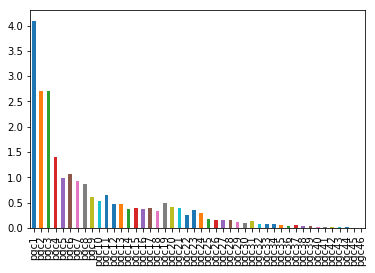

In [4]:
Y1[Y1.columns[17:63]].mean().plot(kind='bar')
plt.show()

pgc:PrimaryConditionGroup
sp:specialty
ps:plcsvc

In [5]:
ls_num_data = [col for col in Y1.columns if 'no_' in col]
ls_num_data.append("TARGET")
df = Y1[ls_num_data]
df[df.columns[1:]].corr()['TARGET'][:]

no_Providers                 0.176541
no_Vendors                   0.173079
no_PCPs                      0.008796
no_PlaceSvcs                 0.146320
no_Specialities              0.136229
no_PrimaryConditionGroups    0.168534
no_ProcedureGroups           0.127066
TARGET                       1.000000
Name: TARGET, dtype: float64

In [12]:
Y1['TARGET'].value_counts(normalize=True) * 100

0     84.522213
1      6.358663
2      3.111602
3      1.910887
4      1.284884
5      0.743050
6      0.490544
15     0.343249
7      0.336674
8      0.227518
9      0.194640
10     0.139404
11     0.105211
12     0.096005
13     0.080223
14     0.055236
Name: TARGET, dtype: float64

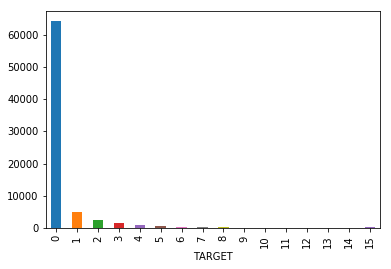

In [13]:
Y1.groupby(['TARGET']).size().plot.bar()

đa số các bệnh nhân có DIH ở năm 1 băng 0

In [17]:
Y1['no_Claims'][Y1['TARGET'] == 0].value_counts()

1     6363
2     5720
3     5345
4     4824
5     4264
6     3875
7     3368
8     2787
9     2669
10    2267
11    2038
12    1888
13    1567
14    1475
15    1332
16    1162
17    1100
18     910
19     843
20     757
21     726
22     644
23     620
24     544
25     543
26     499
27     464
28     434
29     400
30     400
32     392
34     384
43     380
33     377
31     374
36     368
35     368
38     357
37     354
39     328
40     297
41     260
42     190
0       12
Name: no_Claims, dtype: int64

Có thể thấy mặc dù các bệnh nhân có số lần claims lớn hơn 0 nhưng vẫn có DIH bằng 0

In [20]:
dif_than_0 = Y1[Y1['TARGET'] != 0]
dif_than_0.head()

,Year,MemberID,LabCount_total,LabCount_months,DrugCount_total,DrugCount_months,no_Claims,no_Providers,no_Vendors,no_PCPs,...,age_55,age_65,age_75,age_85,age_MISS,SexMALE,sexFEMALE,sexMISS,ClaimsTruncated,TARGET
2,Y1,11951,3.0,1.0,0.0,0.0,6,3,3,1,...,0,0,0,0,0,0,1,0,0,1
9,Y1,20072,1.0,1.0,13.0,7.0,14,6,6,1,...,0,0,0,0,1,0,0,1,0,3
12,Y1,21207,16.0,2.0,27.0,6.0,30,10,8,1,...,0,0,0,1,0,0,1,0,1,1
17,Y1,33120,11.0,3.0,18.0,6.0,9,5,5,1,...,0,0,0,0,1,0,0,1,0,15
22,Y1,43452,4.0,2.0,0.0,0.0,6,3,3,1,...,0,0,0,0,0,0,1,0,0,2


In [21]:
df_not_0 = dif_than_0[ls_num_data]
df_not_0[df_not_0.columns[1:]].corr()['TARGET'][:]

no_Providers                 0.152559
no_Vendors                   0.149952
no_PCPs                     -0.002621
no_PlaceSvcs                 0.144491
no_Specialities              0.127860
no_PrimaryConditionGroups    0.154172
no_ProcedureGroups           0.123459
TARGET                       1.000000
Name: TARGET, dtype: float64

In [27]:
equals_0 = Y1[Y1['TARGET'] == 0]
equals_0.head()

,Year,MemberID,LabCount_total,LabCount_months,DrugCount_total,DrugCount_months,no_Claims,no_Providers,no_Vendors,no_PCPs,...,age_55,age_65,age_75,age_85,age_MISS,SexMALE,sexFEMALE,sexMISS,ClaimsTruncated,TARGET
0,Y1,210,2.0,1.0,5.0,3.0,8,4,4,2,...,0,0,0,0,0,0,0,1,0,0
1,Y1,3889,10.0,1.0,30.0,10.0,13,7,7,1,...,0,0,0,0,1,0,1,0,0,0
3,Y1,14661,2.0,1.0,1.0,1.0,2,2,2,1,...,0,0,0,0,0,0,0,1,0,0
4,Y1,14778,2.0,1.0,6.0,5.0,6,5,4,2,...,0,0,0,0,0,0,1,0,0,0
5,Y1,17249,2.0,1.0,0.0,0.0,4,1,1,1,...,0,0,0,0,0,0,1,0,0,0


In [32]:
df_0 = equals_0[ls_num_data]
df_0[df_0.columns[1:]].corr()['TARGET'][:]

no_Providers                NaN
no_Vendors                  NaN
no_PCPs                     NaN
no_PlaceSvcs                NaN
no_Specialities             NaN
no_PrimaryConditionGroups   NaN
no_ProcedureGroups          NaN
TARGET                      NaN
Name: TARGET, dtype: float64